# PYTHON LIBRARY

In [ ]:
# Import Python Library

# For Twitter authentication
import tweepy

# To read, save, or load the dataset
import pandas as pd
import csv

# Data Preprocessing
import re 
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import nltk as nlp
import nltk.corpus
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
from nltk.util import everygrams


# For general visualizations / text analysis
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# For classification and sentiment analysis
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# TWITTER API

In [ ]:
# Twitter API Credentials 
consumer_key = 'hwYPVyirt8FlQ1BDixIGaDiAU'
consumer_secret = 'HKQ0tAkSe4jPyaKS2N98QliCPq6RgFDeDGixSp846BrzpH8syX'
access_token = '2979938072-i0vjtgap34jBbjANoFrIZeVgszQHRFaCnVg40YP'
access_secret = 'aEc99tzfU1NJ5cwFDA1yeiTAHhuaChCqTsFRMOkDWj32z'

In [ ]:
# Create the authentication object 
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)

# Set the access token and access token secret
auth.set_access_token(access_token, access_secret)

# Create the API object while passing in the auth information 
api = tweepy.API(auth, wait_on_rate_limit = True)

# DATA CRAWLING AND STORING

In [ ]:
search_words = "coronavirus AND tourism -filter:retweets AND -filter:replies"
 
tweets = tweepy.Cursor(api.search, q=search_words, lang="en", tweet_mode='extended').items(500)
            
tweet_details = [[tweet.created_at, tweet.full_text.replace('\n',' '), tweet.user.screen_name,  tweet.user.followers_count, tweet.user.location] for tweet in tweets]


In [ ]:

tweet_df = pd.DataFrame(data=tweet_details, columns=['timestamp', 'tweet_text', 'username', 'followers_count', "location"])

tweet_df.head(10)

,timestamp,tweet_text,username,followers_count,location
0,2020-07-18 08:48:32,Entire Scots island closes to visitors over co...,ScottishSun,51017,"Glasgow, UK"
1,2020-07-18 08:47:21,Just a careless scam to promote tourism with n...,SamKing44950770,0,
2,2020-07-18 08:45:12,Federal PPP-aid bolsters New Mexico tourism in...,krqe,96052,"Albuquerque, New Mexico"
3,2020-07-18 08:45:00,LIVE BLOG: E.U. extends travel ban on American...,phocuswire,41128,"New York, USA"
4,2020-07-18 08:44:32,Barcelona tourism in flux after coronavirus lo...,boulosnassar,685,Lebanon
5,2020-07-18 08:26:36,They want the economy opened in South Africa w...,LCTH59,134671,Colombia
6,2020-07-18 08:19:39,Japan's Abe faces anger over backflip on coron...,newsfilterio,2953,"New York, NY"
7,2020-07-18 08:15:03,Japan's Go To Travel push in disarray after to...,japantimes,366191,Tokyo
8,2020-07-18 08:14:05,Ben Houchen has launched a new support fund to...,Tees_Business,6762,Teesside & Tees Valley
9,2020-07-18 08:04:20,Coronavirus is crushing tourism – and cutting ...,SoClaimon,4445,"Bangkok, Thailand"


In [ ]:
tweet_df.to_csv('raw_tweets.csv')

In [ ]:
tweet_df.username.value_counts()

poandpo            13
phocuswire         10
thehill             6
gtpgr               5
DemocratBoricua     3
                   ..
TheFrontierPost     1
odditiesbyqwyck     1
ghanatourismGTA     1
FloridaIssues       1
rossroams22         1
Name: username, Length: 441, dtype: int64

# DATA PREPROCESSING

In [ ]:
# Create a list and for-loop to clean the tweets and store it into a new variable called cleaned_tweet
cleaned_tweet_list = []
for cleaned_tweet in tweet_df.tweet_text:
    cleaned_tweet = cleaned_tweet.lower() # convert tweet to lowercase 
    cleaned_tweet = re.sub(r'@[A-Za-z0-9-_]+', '', cleaned_tweet) # Removed @mentions
    cleaned_tweet = re.sub(r"'[A-Za-z0-9-_]+", '', cleaned_tweet) # Removed 's
    cleaned_tweet = re.sub(r'https?:\/\/\S+', '', cleaned_tweet) # Remove the hyper link
    cleaned_tweet = re.sub(r'(\s*)amp(\s*)+', '', cleaned_tweet) # Remove amp (because &amp is a HTML code for an ampersand, if it shows up as this there's an error in the coding.)
    cleaned_tweet = ''.join(word for word in cleaned_tweet if not word.isdigit())
    cleaned_tweet = nltk.word_tokenize(cleaned_tweet) # Tokenization
    table = str.maketrans('', '', string.punctuation) 
    stripped = [word.translate(table) for word in cleaned_tweet] # Remove Punctuation
    cleaned_tweet = [word for word in stripped if word.isalpha()] # Remove remaining tokens that are not alphabetic (emoji and non-english words)
    cleaned_tweet = [word for word in cleaned_tweet if not word in 
                    set(stopwords.words("english"))] # Remove stopwords
    lemma = nlp.WordNetLemmatizer()
    cleaned_tweet = [lemma.lemmatize(word) for word in cleaned_tweet]
    cleaned_tweet = " ".join(word for word in cleaned_tweet if len(word) > 1) # Lemmatization           
    cleaned_tweet_list.append(cleaned_tweet)

In [ ]:
# Print the dataset 
tweet_df["cleaned_tweet"] = cleaned_tweet_list
tweet_df.head(10)

,timestamp,tweet_text,username,followers_count,location,cleaned_tweet
0,2020-07-18 08:48:32,Entire Scots island closes to visitors over co...,ScottishSun,51017,"Glasgow, UK",entire scot island close visitor coronavirus fear
1,2020-07-18 08:47:21,Just a careless scam to promote tourism with n...,SamKing44950770,0,,careless scam promote tourism regard life tour...
2,2020-07-18 08:45:12,Federal PPP-aid bolsters New Mexico tourism in...,krqe,96052,"Albuquerque, New Mexico",federal pppaid bolster new mexico tourism indu...
3,2020-07-18 08:45:00,LIVE BLOG: E.U. extends travel ban on American...,phocuswire,41128,"New York, USA",live blog eu extends travel ban american amid ...
4,2020-07-18 08:44:32,Barcelona tourism in flux after coronavirus lo...,boulosnassar,685,Lebanon,barcelona tourism flux coronavirus lockdown bo...
5,2020-07-18 08:26:36,They want the economy opened in South Africa w...,LCTH59,134671,Colombia,want economy opened south africa whilst peak c...
6,2020-07-18 08:19:39,Japan's Abe faces anger over backflip on coron...,newsfilterio,2953,"New York, NY",japan abe face anger backflip coronavirusspurr...
7,2020-07-18 08:15:03,Japan's Go To Travel push in disarray after to...,japantimes,366191,Tokyo,japan go travel push disarray tourism chief wa...
8,2020-07-18 08:14:05,Ben Houchen has launched a new support fund to...,Tees_Business,6762,Teesside & Tees Valley,ben houchen launched new support fund give sma...
9,2020-07-18 08:04:20,Coronavirus is crushing tourism – and cutting ...,SoClaimon,4445,"Bangkok, Thailand",coronavirus crushing tourism cutting lifeline ...


In [ ]:
tweet_df.to_csv('cleaned_tweets.csv')

In [ ]:
# Removing whitespaces by splitting cleaned_tweet for counter
def split_name(cleaned_tweet):
    split = str(cleaned_tweet).split()
    return split

# Store the data in a list for text visualization
tweets_count_list = []
for x in cleaned_tweet_list:
    for y in split_name(x):
        tweets_count_list.append(y)

# TEXT ANALYSIS

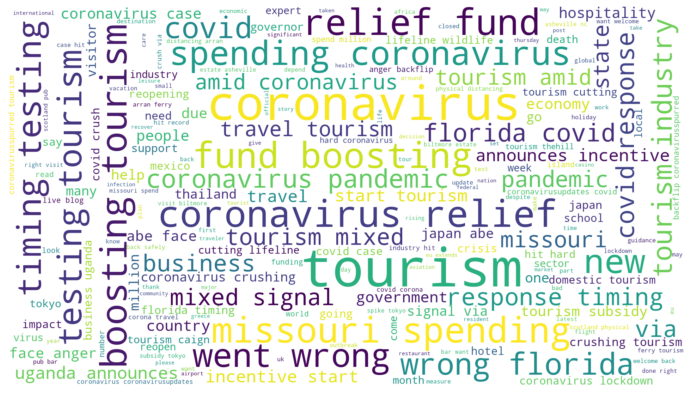

In [ ]:
# Plot the word cloud 
plt.figure(figsize=(15,7))
allWords = ' '.join([twts for twts in tweets_count_list])
wordCloud = WordCloud(background_color='white', width=1920, height=1080, random_state = 21, max_font_size=150).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.savefig('cleaned_tweet_wordcloud.png')
plt.show()

[Text(0, 0, "('coronavirus', 'relief')"),
 Text(0, 0, "('relief', 'fund')"),
 Text(0, 0, "('boosting', 'tourism')"),
 Text(0, 0, "('coronavirus', 'relief', 'fund')"),
 Text(0, 0, "('fund', 'boosting')"),
 Text(0, 0, "('relief', 'fund', 'boosting')"),
 Text(0, 0, "('fund', 'boosting', 'tourism')"),
 Text(0, 0, "('coronavirus', 'relief', 'fund', 'boosting')"),
 Text(0, 0, "('relief', 'fund', 'boosting', 'tourism')"),
 Text(0, 0, "('missouri', 'spending')"),
 Text(0, 0, "('spending', 'coronavirus')"),
 Text(0, 0, "('spending', 'coronavirus', 'relief')"),
 Text(0, 0, "('went', 'wrong')"),
 Text(0, 0, "('timing', 'testing')"),
 Text(0, 0, "('testing', 'tourism')"),
 Text(0, 0, "('timing', 'testing', 'tourism')"),
 Text(0, 0, "('spending', 'coronavirus', 'relief', 'fund')"),
 Text(0, 0, "('wrong', 'florida')"),
 Text(0, 0, "('went', 'wrong', 'florida')"),
 Text(0, 0, "('missouri', 'spending', 'coronavirus')"),
 Text(0, 0, "('missouri', 'spending', 'coronavirus', 'relief')"),
 Text(0, 0, "('t

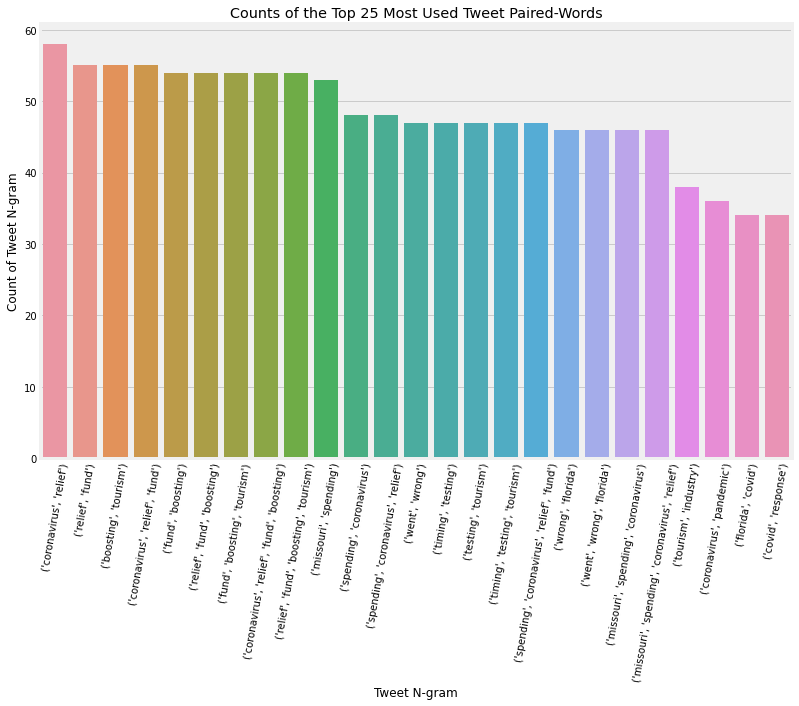

In [ ]:
# Top 25 used Tweet Ngrams in cleaned_tweets
top_25_ngrams = Counter(everygrams(tweets_count_list, min_len=2, max_len=4)).most_common(25)

# Put our findings in dataframe for further visualizations
sub_plot=pd.DataFrame(top_25_ngrams)
sub_plot.rename(columns={0:'Tweet N-gram', 1:'Count'}, inplace=True)

# Use barplot for this visualization
plt.figure(figsize=(12,8))
viz_1=sns.barplot(x='Tweet N-gram', y='Count', data=sub_plot)
viz_1.set_title('Counts of the Top 25 Most Used Tweet Paired-Words')
viz_1.set_ylabel('Count of Tweet N-gram')
viz_1.set_xlabel('Tweet N-gram')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=80)

[Text(0, 0, 'tourism'),
 Text(0, 0, 'coronavirus'),
 Text(0, 0, 'covid'),
 Text(0, 0, 'missouri'),
 Text(0, 0, 'travel'),
 Text(0, 0, 'pandemic'),
 Text(0, 0, 'relief'),
 Text(0, 0, 'fund'),
 Text(0, 0, 'florida'),
 Text(0, 0, 'spending'),
 Text(0, 0, 'industry'),
 Text(0, 0, 'via'),
 Text(0, 0, 'boosting'),
 Text(0, 0, 'testing'),
 Text(0, 0, 'business'),
 Text(0, 0, 'went'),
 Text(0, 0, 'wrong'),
 Text(0, 0, 'timing'),
 Text(0, 0, 'case'),
 Text(0, 0, 'amid'),
 Text(0, 0, 'japan'),
 Text(0, 0, 'response'),
 Text(0, 0, 'new'),
 Text(0, 0, 'mixed'),
 Text(0, 0, 'signal')]

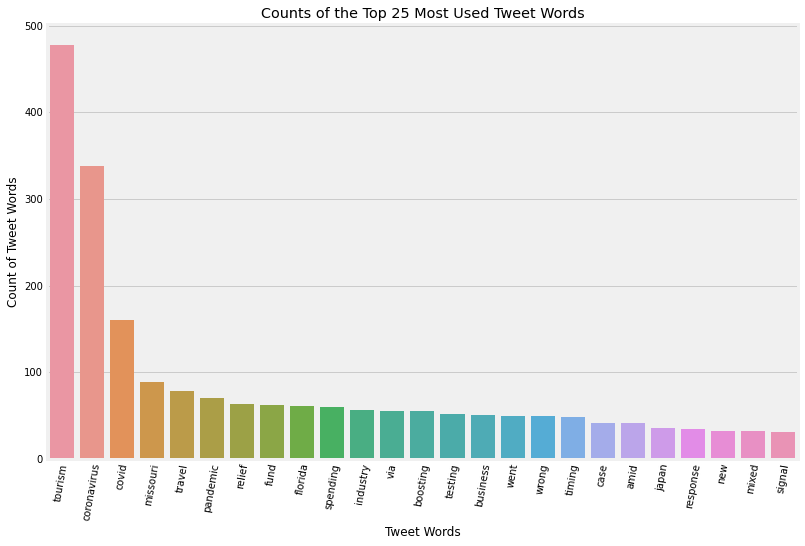

In [ ]:
# Top 25 used Tweet Words in cleaned_tweets
top_25_tweets = Counter(tweets_count_list).most_common()
top_25_tweets = top_25_tweets[0:25]

# Put our findings in dataframe for further visualizations
sub_plot=pd.DataFrame(top_25_tweets)
sub_plot.rename(columns={0:'Tweet Words', 1:'Count'}, inplace=True)

# Use barplot for this visualization
plt.figure(figsize=(12,8))
viz_1=sns.barplot(x='Tweet Words', y='Count', data=sub_plot)
viz_1.set_title('Counts of the Top 25 Most Used Tweet Words')
viz_1.set_ylabel('Count of Tweet Words')
viz_1.set_xlabel('Tweet Words')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=80)

# SENTIMENT ANALYSIS – THE LEXICON BASED APPROACH

In [ ]:
# Create a function to get the subjectivity
def getSubjectivity(cleaned_tweet): 
  return TextBlob(cleaned_tweet).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(cleaned_tweet): 
  return TextBlob(cleaned_tweet).sentiment.polarity

# Create two new columns
tweet_df['subjectivity'] = tweet_df['cleaned_tweet'].apply(getSubjectivity)
tweet_df['polarity'] = tweet_df['cleaned_tweet'].apply(getPolarity)

# Show the new dataframe with the new columns
tweet_df.head(10)

,timestamp,tweet_text,username,followers_count,location,cleaned_tweet,subjectivity,polarity
0,2020-07-18 08:48:32,Entire Scots island closes to visitors over co...,ScottishSun,51017,"Glasgow, UK",entire scot island close visitor coronavirus fear,0.625000,0.000000
1,2020-07-18 08:47:21,Just a careless scam to promote tourism with n...,SamKing44950770,0,,careless scam promote tourism regard life tour...,0.360000,-0.120000
2,2020-07-18 08:45:12,Federal PPP-aid bolsters New Mexico tourism in...,krqe,96052,"Albuquerque, New Mexico",federal pppaid bolster new mexico tourism indu...,0.454545,0.136364
3,2020-07-18 08:45:00,LIVE BLOG: E.U. extends travel ban on American...,phocuswire,41128,"New York, USA",live blog eu extends travel ban american amid ...,0.250000,0.068182
4,2020-07-18 08:44:32,Barcelona tourism in flux after coronavirus lo...,boulosnassar,685,Lebanon,barcelona tourism flux coronavirus lockdown bo...,0.000000,0.000000
5,2020-07-18 08:26:36,They want the economy opened in South Africa w...,LCTH59,134671,Colombia,want economy opened south africa whilst peak c...,0.100000,-0.100000
6,2020-07-18 08:19:39,Japan's Abe faces anger over backflip on coron...,newsfilterio,2953,"New York, NY",japan abe face anger backflip coronavirusspurr...,0.200000,-0.700000
7,2020-07-18 08:15:03,Japan's Go To Travel push in disarray after to...,japantimes,366191,Tokyo,japan go travel push disarray tourism chief wa...,0.000000,0.000000
8,2020-07-18 08:14:05,Ben Houchen has launched a new support fund to...,Tees_Business,6762,Teesside & Tees Valley,ben houchen launched new support fund give sma...,0.427273,-0.056818
9,2020-07-18 08:04:20,Coronavirus is crushing tourism – and cutting ...,SoClaimon,4445,"Bangkok, Thailand",coronavirus crushing tourism cutting lifeline ...,0.900000,-0.100000


In [ ]:
# Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score): 
  if score < 0: 
    return -1 #negative
  elif score == 0:
    return 0 #neutral
  else:
    return 1 #positive
  
tweet_df['analysis'] = tweet_df['polarity'].apply(getAnalysis)

tweet_df.head(10)

,timestamp,tweet_text,username,followers_count,location,cleaned_tweet,subjectivity,polarity,analysis
0,2020-07-18 08:48:32,Entire Scots island closes to visitors over co...,ScottishSun,51017,"Glasgow, UK",entire scot island close visitor coronavirus fear,0.625000,0.000000,0
1,2020-07-18 08:47:21,Just a careless scam to promote tourism with n...,SamKing44950770,0,,careless scam promote tourism regard life tour...,0.360000,-0.120000,-1
2,2020-07-18 08:45:12,Federal PPP-aid bolsters New Mexico tourism in...,krqe,96052,"Albuquerque, New Mexico",federal pppaid bolster new mexico tourism indu...,0.454545,0.136364,1
3,2020-07-18 08:45:00,LIVE BLOG: E.U. extends travel ban on American...,phocuswire,41128,"New York, USA",live blog eu extends travel ban american amid ...,0.250000,0.068182,1
4,2020-07-18 08:44:32,Barcelona tourism in flux after coronavirus lo...,boulosnassar,685,Lebanon,barcelona tourism flux coronavirus lockdown bo...,0.000000,0.000000,0
5,2020-07-18 08:26:36,They want the economy opened in South Africa w...,LCTH59,134671,Colombia,want economy opened south africa whilst peak c...,0.100000,-0.100000,-1
6,2020-07-18 08:19:39,Japan's Abe faces anger over backflip on coron...,newsfilterio,2953,"New York, NY",japan abe face anger backflip coronavirusspurr...,0.200000,-0.700000,-1
7,2020-07-18 08:15:03,Japan's Go To Travel push in disarray after to...,japantimes,366191,Tokyo,japan go travel push disarray tourism chief wa...,0.000000,0.000000,0
8,2020-07-18 08:14:05,Ben Houchen has launched a new support fund to...,Tees_Business,6762,Teesside & Tees Valley,ben houchen launched new support fund give sma...,0.427273,-0.056818,-1
9,2020-07-18 08:04:20,Coronavirus is crushing tourism – and cutting ...,SoClaimon,4445,"Bangkok, Thailand",coronavirus crushing tourism cutting lifeline ...,0.900000,-0.100000,-1


In [ ]:
del tweet_df['location']
del tweet_df['followers_count']
tweet_df.head()

,timestamp,tweet_text,username,cleaned_tweet,subjectivity,polarity,analysis
0,2020-07-18 08:48:32,Entire Scots island closes to visitors over co...,ScottishSun,entire scot island close visitor coronavirus fear,0.625000,0.000000,0
1,2020-07-18 08:47:21,Just a careless scam to promote tourism with n...,SamKing44950770,careless scam promote tourism regard life tour...,0.360000,-0.120000,-1
2,2020-07-18 08:45:12,Federal PPP-aid bolsters New Mexico tourism in...,krqe,federal pppaid bolster new mexico tourism indu...,0.454545,0.136364,1
3,2020-07-18 08:45:00,LIVE BLOG: E.U. extends travel ban on American...,phocuswire,live blog eu extends travel ban american amid ...,0.250000,0.068182,1
4,2020-07-18 08:44:32,Barcelona tourism in flux after coronavirus lo...,boulosnassar,barcelona tourism flux coronavirus lockdown bo...,0.000000,0.000000,0


In [ ]:
tweet_df.to_csv('cleaned_tweets_sentiment.csv')

In [ ]:
tweet_df.analysis.value_counts()

 0    186
 1    158
-1    156
Name: analysis, dtype: int64

In [ ]:
# Get the percentage of positive tweets
ptweets = tweet_df[tweet_df.analysis == 1]
ptweets = ptweets['cleaned_tweet']

round( (ptweets.shape[0] / tweet_df.shape[0] * 100), 2)

31.6

In [ ]:
# Get the percentage of negative tweets
ntweets = tweet_df[tweet_df.analysis == -1]
ntweets = ntweets['cleaned_tweet']

round( (ntweets.shape[0] / tweet_df.shape[0] * 100), 2)

31.2

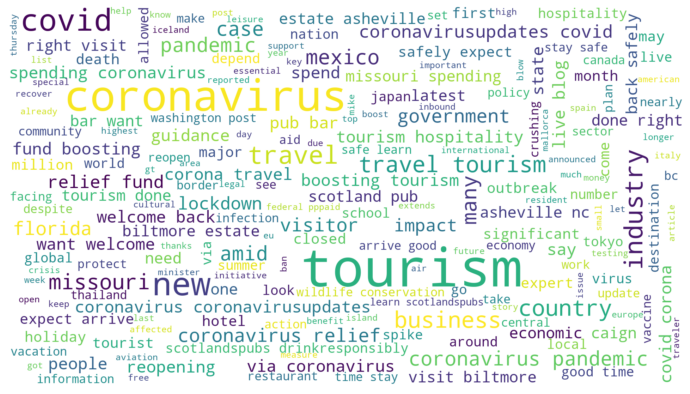

In [ ]:
# Plot the Positive word cloud 
plt.figure(figsize=(15,7))
allWords = ' '.join([twts for twts in ptweets])
wordCloud = WordCloud(background_color='white', width=1920, height=1080, random_state = 21, max_font_size=150).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.savefig('cleaned_tweet_positive_wordcloud.png')
plt.show()

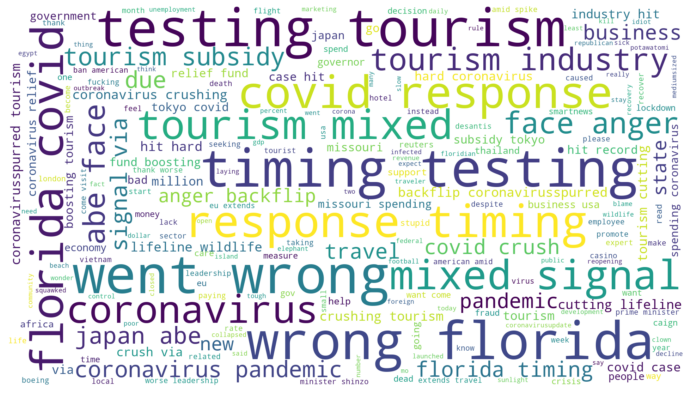

In [ ]:
# Plot the Negative word cloud 
plt.figure(figsize=(15,7))
allWords = ' '.join([twts for twts in ntweets])
wordCloud = WordCloud(background_color='white', width=1920, height=1080, random_state = 21, max_font_size=150).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.savefig('cleaned_tweet_negative_wordcloud.png')
plt.show()

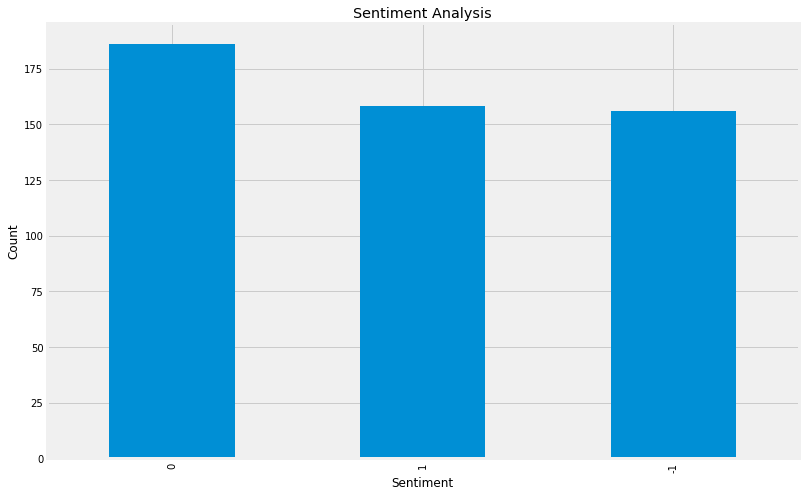

In [ ]:
# Plot and visualize the counts of sentiment analysis
plt.figure(figsize=(12,8))
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
tweet_df['analysis'].value_counts().plot(kind='bar') 
plt.show()

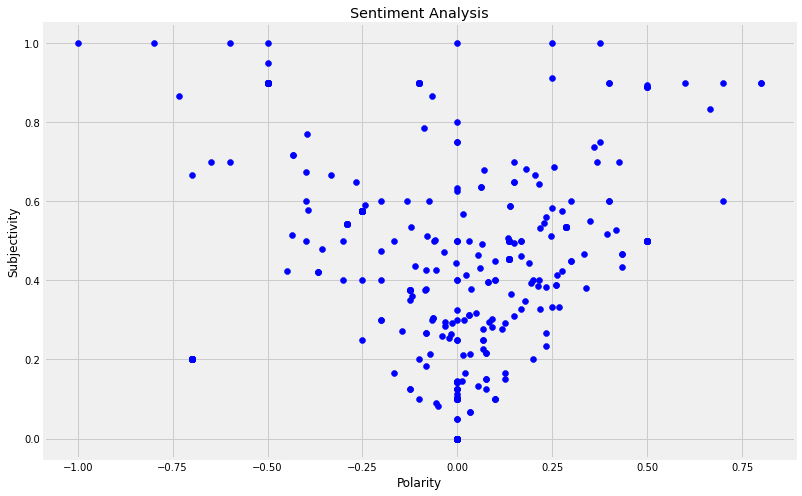

In [ ]:
# Plot the polarity and subjectivity
plt.figure(figsize=(12,8))
for i in range(0, tweet_df.shape[0]): 
  plt.scatter(tweet_df['polarity'][i], tweet_df['subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   timestamp      500 non-null    datetime64[ns]
 1   tweet_text     500 non-null    object        
 2   username       500 non-null    object        
 3   cleaned_tweet  500 non-null    object        
 4   subjectivity   500 non-null    float64       
 5   polarity       500 non-null    float64       
 6   analysis       500 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 27.5+ KB


# SENTIMENT ANALYSIS – MACHINE LEARNING BASED APPROACH (CLASSIFICATION) 

In [ ]:
# Feature Generation using TF-IDF
tf=TfidfVectorizer()
tweet_tf= tf.fit_transform(tweet_df['cleaned_tweet'])

# Split Train and Test set (TF-IDF)
x_train, x_test, y_train, y_test = train_test_split(
    tweet_tf, tweet_df['analysis'], test_size=0.2, random_state=3)

# Model Building and Evaluation (TF-IDF) using Multinomial Naive Bayes Classification
clf = MultinomialNB().fit(x_train, y_train)
predicted = clf.predict(x_test)
print(classification_report(predicted,y_test))
print(confusion_matrix(predicted,y_test))
print(accuracy_score(predicted,y_test))
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

              precision    recall  f1-score   support

          -1       0.75      0.75      0.75        28
           0       0.80      0.71      0.75        49
           1       0.64      0.78      0.71        23

    accuracy                           0.74       100
   macro avg       0.73      0.75      0.74       100
weighted avg       0.75      0.74      0.74       100

[[21  5  2]
 [ 6 35  8]
 [ 1  4 18]]
0.74
MultinomialNB Accuracy: 0.74
